In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from astropy.io import ascii
from utils import *
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
datasets = "../datasets/SuperCOSMOS/"
uki823_df = ascii.read(datasets + "UKI823/sssedrpair.dat").to_pandas()

In [3]:
uki823_df.columns = col_names
#ukr823_df.columns = col_names
#ukj823_df.columns = col_names
uki823_df.head()

,RA,DEC,XMIN,XMAX,YMIN,YMAX,AREA,IPEAK,COSMAG,ISKY,...,"N(0,1)",PRFMAG,C_COSMAG,C_PRFMAG,RA_SDSS,DEC_SDSS,GMAG_SDSS,RMAG_SDSS,IMAG_SDSS,CLASS_SDSS
0,627905166,-1862044,22405186,22421181,10590948,10604948,161,42793408,-22923,17532226,...,-777,-23019,15.639,14.998,359.763288,-1.067042,19.127230,17.637123,15.888538,6
1,628109952,-662364,21782348,21792346,14279944,14289944,46,5089298,-20025,18211806,...,4639,-20435,17.703,17.800,359.880409,-0.379610,19.122244,18.505545,18.302338,6
2,628195987,-1076412,21517417,21529414,13006944,13018944,87,17260390,-21479,17841694,...,-51,-21669,16.723,16.460,359.929869,-0.616716,19.118631,17.716108,17.013582,6
3,628311942,-518403,21162509,21172507,14721942,14731942,57,7749678,-20599,18688688,...,-259,-20958,17.357,17.232,359.996295,-0.297037,19.114597,18.120455,17.692406,6
4,627218041,-1032678,24519637,24532633,13137958,13149958,84,14814466,-21295,17692354,...,111,-21519,16.848,16.623,359.369486,-0.591688,19.112507,17.852146,17.173191,6


In [4]:
uki823_df.describe()

,RA,DEC,XMIN,XMAX,YMIN,YMAX,AREA,IPEAK,COSMAG,ISKY,...,"N(0,1)",PRFMAG,C_COSMAG,C_PRFMAG,RA_SDSS,DEC_SDSS,GMAG_SDSS,RMAG_SDSS,IMAG_SDSS,CLASS_SDSS
count,1.564500e+04,1.564500e+04,1.564500e+04,1.564500e+04,1.564500e+04,1.564500e+04,15645.000000,1.564500e+04,15645.000000,1.564500e+04,...,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000
mean,3.037003e+08,8.493844e+04,2.101054e+07,2.102133e+07,1.657487e+07,1.658549e+07,92.001151,1.319364e+07,-20152.272867,1.808098e+07,...,2716.035986,-20838.007670,17.481817,17.367207,174.007529,0.048635,19.528314,18.495397,17.893314,4.885331
std,3.131201e+08,1.264880e+06,3.094560e+06,3.094725e+06,3.885662e+06,3.885580e+06,314.990581,1.817166e+07,1971.753396,4.441520e+05,...,3628.301001,1759.041618,1.285655,1.894035,179.404607,0.724706,2.194382,1.931732,1.773068,1.449708
min,1.440000e+02,-2.170521e+06,1.578191e+07,1.579490e+07,9.640962e+06,9.652950e+06,8.000000,1.297920e+06,-28893.000000,1.709983e+07,...,-8899.000000,-34317.000000,11.154000,4.781000,0.000165,-1.243447,8.985260,6.618781,6.940934,3.000000
25%,8.761940e+05,-9.941590e+05,1.829625e+07,1.830425e+07,1.326194e+07,1.327096e+07,17.000000,2.348600e+06,-21393.000000,1.769842e+07,...,153.000000,-21599.000000,16.776000,16.536000,0.502112,-0.569497,18.465448,17.573668,17.055212,3.000000
50%,1.691507e+06,1.317640e+05,2.097056e+07,2.098055e+07,1.671895e+07,1.672794e+07,37.000000,3.912512e+06,-19703.000000,1.802993e+07,...,2189.000000,-20233.000000,17.858000,18.019000,0.969110,0.075373,19.967171,18.960104,18.355196,6.000000
75%,6.274335e+08,1.190811e+06,2.367885e+07,2.368885e+07,1.997294e+07,1.998294e+07,92.000000,1.417421e+07,-18561.000000,1.845908e+07,...,4545.000000,-19562.000000,18.471000,18.748000,359.492904,0.682301,21.087143,19.793398,19.087181,6.000000
max,6.283183e+08,2.222493e+06,2.651011e+07,2.654111e+07,2.313795e+07,2.315595e+07,24006.000000,1.210549e+08,-17410.000000,1.899585e+07,...,102961.000000,-18962.000000,19.292000,19.399000,359.999933,1.273383,22.999374,24.802490,27.166468,6.000000


In [5]:
#Normalise SDSS class labels. Form confusion matrix
normalise_sdss_class(uki823_df)
uki823_df[['CLASS', 'CLASS_SDSS']]
confusion_matrix(uki823_df['CLASS'], uki823_df['CLASS_SDSS'])

array([[4537, 3612,    0,    0],
       [1225, 6191,    0,    0],
       [  11,    2,    0,    0],
       [  40,   27,    0,    0]])

In [6]:
#Create first raw dataset
data_x_raw = uki823_df.iloc[:,:-1]
data_y_raw =uki823_df['CLASS_SDSS']

In [7]:
#Split raw dataset into raw train,val,test sets
from sklearn.model_selection import train_test_split
random_state = 1
X_train_raw,X_test_raw,y_train,y_test = train_test_split(data_x_raw,data_y_raw,test_size=0.1,random_state=random_state)
X_train_raw,X_val_raw,y_train,y_val = train_test_split(X_train_raw,y_train,test_size=2./9,random_state=random_state)

In [17]:
X_train_raw = X_train_raw.reset_index(drop=True)
X_val_raw = X_val_raw.reset_index(drop=True)
X_test_raw = X_test_raw.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train_raw.head()

,RA,DEC,XMIN,XMAX,YMIN,YMAX,AREA,IPEAK,COSMAG,ISKY,...,QUALITY,"N(0,1)",PRFMAG,C_COSMAG,C_PRFMAG,RA_SDSS,DEC_SDSS,GMAG_SDSS,RMAG_SDSS,IMAG_SDSS
0,628210746,-1176630,21469430,21485425,12697944,12709944,110,28187956,-22062,17845382,...,0,-177,-22180,16.299,15.906,359.938326,-0.674138,19.356489,17.871933,16.739737
1,883647,-1937461,18422221,18435217,10360939,10374939,111,29238444,-22154,17764206,...,0,-991,-22265,16.227,15.813,0.506194,-1.110286,18.609985,20.223934,18.597603
2,626820565,-225778,25746317,25752316,15617966,15625966,25,2608574,-18898,17632718,...,0,5282,-19766,18.305,18.526,359.141781,-0.129471,20.414120,19.358303,18.915371
3,53294,-10961,20976557,20992553,16275941,16293941,180,46620048,-23110,18452752,...,16,-393,-23230,15.539,14.770,0.030579,-0.006282,16.176212,15.634457,15.433255
4,626725557,834940,26040239,26048237,18876967,18885967,43,7318124,-20160,17651086,...,1024,28,-20557,17.644,17.667,359.087359,0.478322,20.911127,19.339987,17.994114


In [15]:
#Define classification function
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,roc_auc_score

def Classify_Function(x_train,y_train,x_val,y_val):
    names = ["Logistic Regression", #"Linear SVM", "RBF SVM",
             "Decision Tree", "Random Forest", "Neural Net (Multi-layer perceptron)"]

    classifiers = [
        LogisticRegression(),
        #SVC(kernel="linear", probability=True, random_state=random_state),
        #SVC(kernel='rbf', probability=True, random_state=random_state),
        DecisionTreeClassifier(max_depth=10),
        RandomForestClassifier(max_depth=10, n_estimators=50,random_state=random_state),
        MLPClassifier(max_iter=1000, random_state=random_state)]

    ca_score = {} # Classification accuracy
    F1_scores = {} #F1 scores
    tr_score = {}
    tr_F1 = {}

    for name, clf in zip(names, classifiers):
        clf.fit(x_train, y_train)
        tr_score[name] = clf.score(x_train, y_train)
        ca_score[name] = clf.score(x_val, y_val)
        tr_F1[name] = f1_score(y_train, clf.predict(x_train), average='macro')
        F1_scores[name] = f1_score(y_val,clf.predict(x_val),average='macro')

    print('Classification performance on validation set:')
    for clf in names:
        print ("{}, training accuracy: {:.3f}, training f1: {:.3f}".format(clf, tr_score[clf], tr_F1[clf]))
        print ("{}, accuracy: {:.3f}, f1-score: {:.3f}\n\n".format(clf, ca_score[clf], F1_scores[clf]))


In [18]:
#Classify the raw data
Classify_Function(X_train_raw,y_train,X_val_raw,y_val)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification performance on validation set:
Logistic Regression, training accuracy: 0.654, training f1: 0.521
Logistic Regression, accuracy: 0.643, f1-score: 0.514


Decision Tree, training accuracy: 0.934, training f1: 0.930
Decision Tree, accuracy: 0.873, f1-score: 0.866


Random Forest, training accuracy: 0.943, training f1: 0.939
Random Forest, accuracy: 0.883, f1-score: 0.877


Neural Net (Multi-layer perceptron), training accuracy: 0.677, training f1: 0.644
Neural Net (Multi-layer perceptron), accuracy: 0.677, f1-score: 0.645




/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


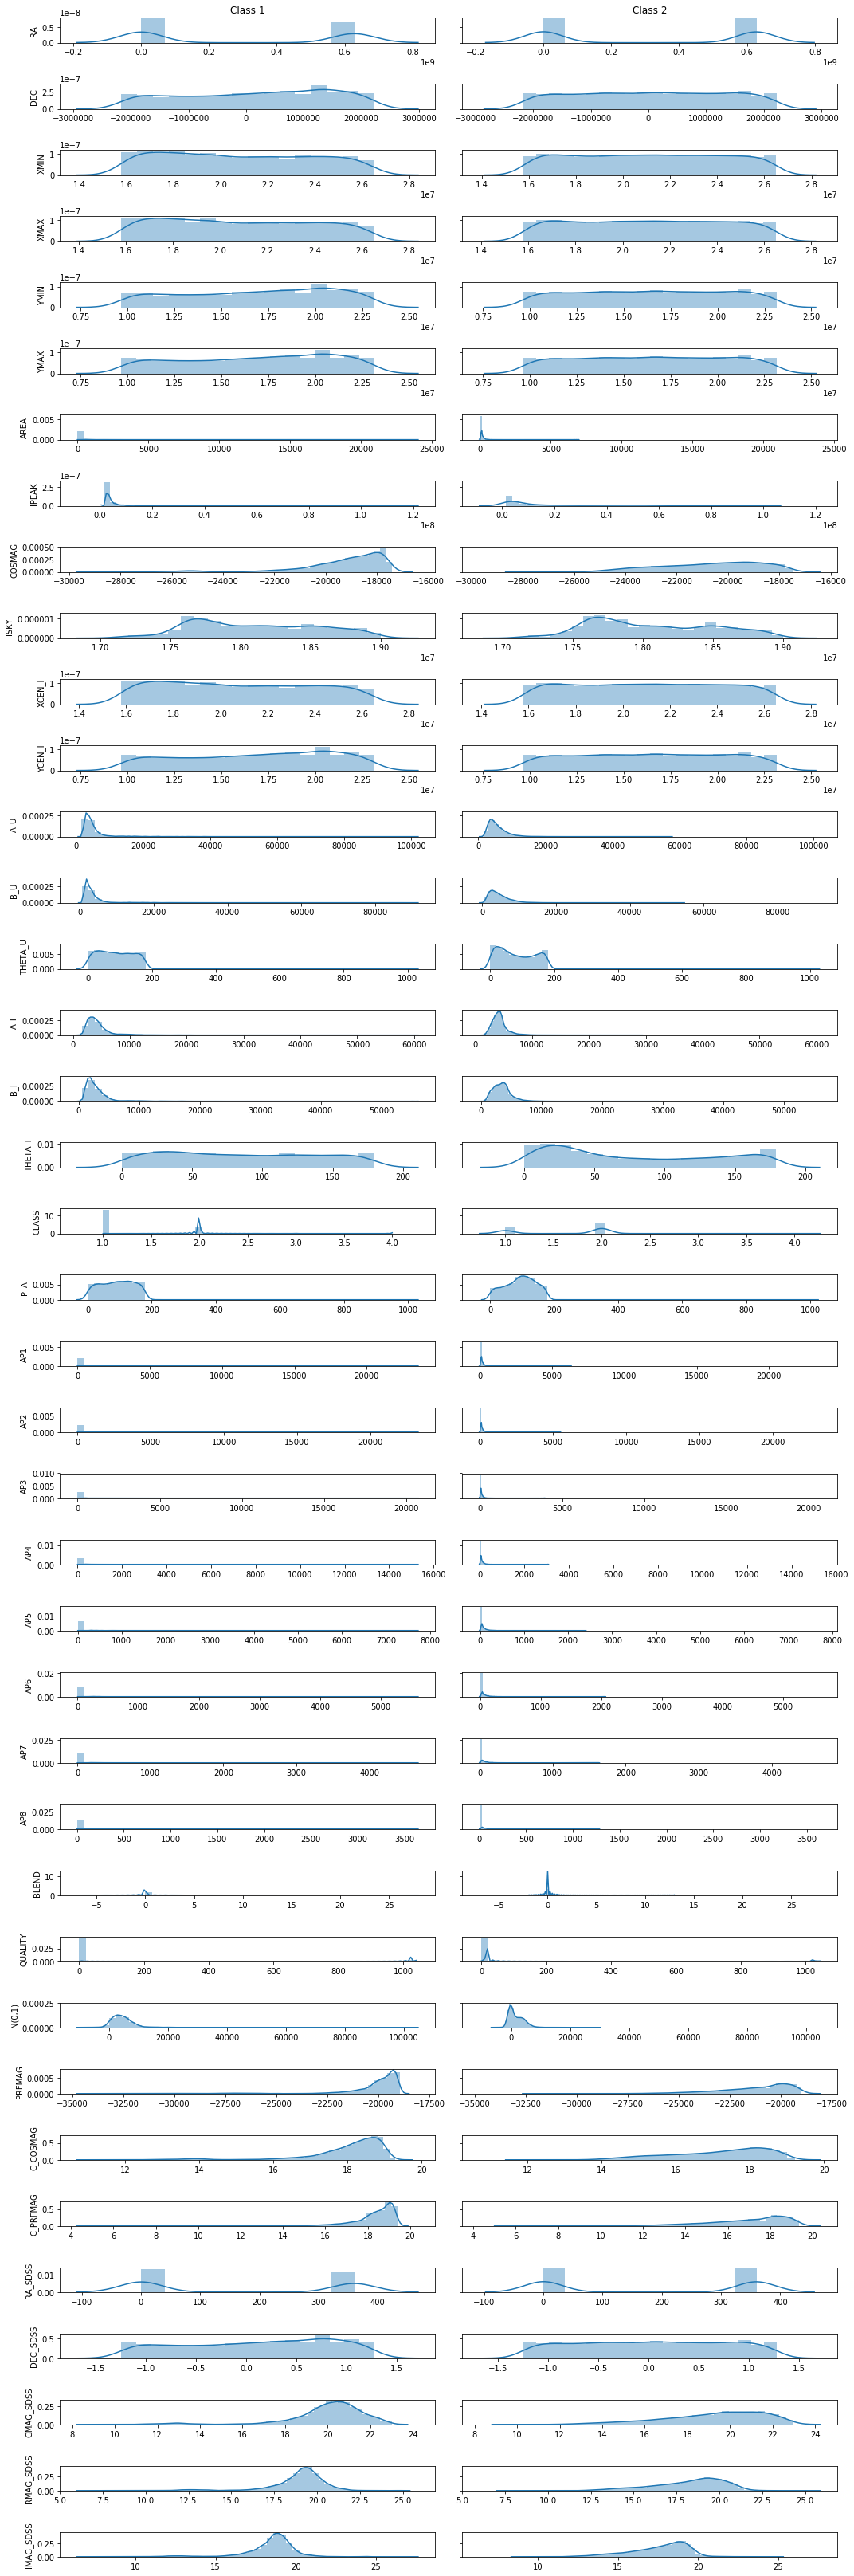

In [19]:
labels = np.array([1,2])
fig, ax = plt.subplots((len(X_train_raw.columns)), labels.size, figsize=(15,45), sharey = 'row', sharex = 'row')


for ii, feat in enumerate(X_train_raw):
    for jj, clas in enumerate(labels):
        sns.distplot(X_train_raw[y_train==clas][feat], ax=ax[ii][jj], kde=True)
        ax[ii][jj].xaxis.label.set_visible(False)
           
[ax[0][ii].set_title("Class {}".format(clas)) for ii, clas in enumerate(labels)]
[ax[ii][0].set_ylabel("{}".format(feat)) for ii, feat in enumerate(X_train_raw)]
        
fig.tight_layout()
plt.show()


In [20]:
X_train = X_train_raw.iloc[:,relevant_indices[0:(len(relevant_indices)-1)]]
X_val = X_val_raw.iloc[:,relevant_indices[0:(len(relevant_indices)-1)]]
X_test = X_test_raw.iloc[:,relevant_indices[0:(len(relevant_indices)-1)]]

In [21]:
#Extracting relevant columns and adding ellips and FF to X datasets
X_train = add_filling_factor(add_ellipticity_df(X_train))
X_val = add_filling_factor(add_ellipticity_df(X_val))
X_test = add_filling_factor(add_ellipticity_df(X_test))
X_train.columns

Index(['AREA', 'IPEAK', 'COSMAG', 'ISKY', 'A_U', 'B_U', 'THETA_U', 'A_I',
       'B_I', 'THETA_I', 'BLEND', 'QUALITY', 'PRFMAG', 'C_COSMAG', 'C_PRFMAG',
       'RA_SDSS', 'DEC_SDSS', 'GMAG_SDSS', 'RMAG_SDSS', 'IMAG_SDSS',
       'ELLIPTICITY', 'FILLING_FACTOR'],
      dtype='object')

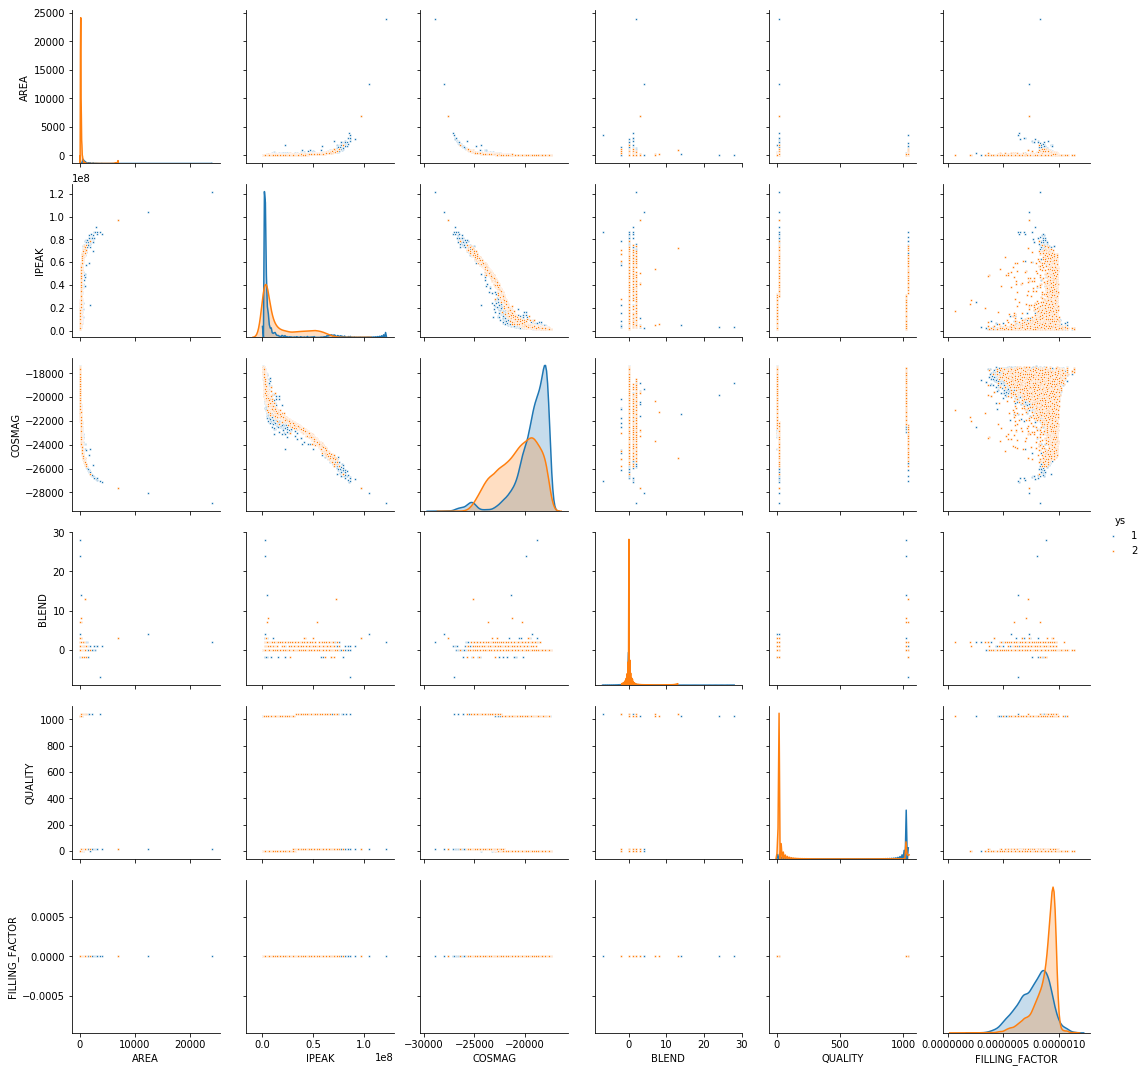

In [22]:
#Identify features that look interesting...
interesting_cols = [0, 1, 2, 10, 11, 21]

# Need to add X_train and y_train back together here
temp = deepcopy(X_train)
temp['ys'] = y_train

sns.pairplot(temp, vars=X_train.columns[interesting_cols], hue='ys', diag_kind = 'kde', plot_kws={'s' : 6})
plt.show()


In [23]:
#Scale dataset and classify
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train.astype('float64'))


Classify_Function(sc.transform(X_train.astype('float64')),
                  y_train,
                  sc.transform(X_val.astype('float64')),
                  y_val)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification performance on validation set:
Logistic Regression, training accuracy: 0.857, training f1: 0.848
Logistic Regression, accuracy: 0.869, f1-score: 0.861


Decision Tree, training accuracy: 0.932, training f1: 0.927
Decision Tree, accuracy: 0.864, f1-score: 0.856


Random Forest, training accuracy: 0.943, training f1: 0.939
Random Forest, accuracy: 0.870, f1-score: 0.864


Neural Net (Multi-layer perceptron), training accuracy: 0.917, training f1: 0.912
Neural Net (Multi-layer perceptron), accuracy: 0.897, f1-score: 0.892




In [24]:
#Fitting PCA to scaled training data. 9 PC's
from sklearn.decomposition import PCA
pca = PCA().fit(sc.transform(X_train.astype('float64')))
print(np.cumsum(pca.explained_variance_ratio_))


[0.52745369 0.61065768 0.68591205 0.75710809 0.8062439  0.85107216
 0.8919348  0.9235014  0.94878263 0.96237037 0.97406442 0.98434364
 0.99308065 0.99584055 0.99767094 0.99849341 0.99903022 0.99953922
 0.99978042 0.99990082 0.99999989 1.        ]


In [25]:
#Calculate PCA scores for all datasets. 11 PCs
eleven_pcs = PCA(n_components = 11).fit(sc.transform(X_train.astype('float64')))
pc_scores_train = eleven_pcs.transform(sc.transform(X_train.astype('float64')))
pc_scores_val = eleven_pcs.transform(sc.transform(X_val.astype('float64')))
pc_scores_test = eleven_pcs.transform(sc.transform(X_test.astype('float64')))

In [26]:
#Define function to plot PC directions
def scatter_2d_label(X_2d, y, s=2, alpha=0.5, lw=2):
    """Visualuse a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    targets = np.unique(y)
    colors = sns.color_palette(n_colors=targets.size)
    for color, target in zip(colors, targets):
        plt.scatter(X_2d[y == target, 0], X_2d[y == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)


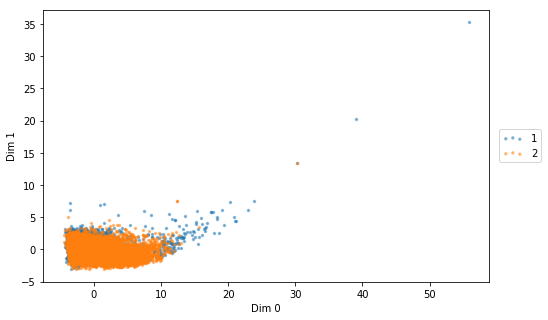

In [27]:
dim_1 = 0# First dimension
dim_2 = 1 # Second dimension
plt.figure(figsize=(8,5)) # Initialise a figure instance with defined size
scatter_2d_label(pc_scores_train[:, [dim_1,dim_2]], y_train)
plt.legend(loc='center left', bbox_to_anchor=[1.01, 0.5], scatterpoints=3) # Add a legend outside the plot at specified point
plt.xlabel('Dim {}'.format(dim_1))
plt.ylabel('Dim {}'.format(dim_2))
plt.show()


In [28]:
Classify_Function(pc_scores_train,y_train,pc_scores_val,y_val)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification performance on validation set:
Logistic Regression, training accuracy: 0.780, training f1: 0.763
Logistic Regression, accuracy: 0.781, f1-score: 0.767


Decision Tree, training accuracy: 0.864, training f1: 0.858
Decision Tree, accuracy: 0.754, f1-score: 0.742


Random Forest, training accuracy: 0.884, training f1: 0.877
Random Forest, accuracy: 0.783, f1-score: 0.770


Neural Net (Multi-layer perceptron), training accuracy: 0.847, training f1: 0.836
Neural Net (Multi-layer perceptron), accuracy: 0.826, f1-score: 0.814




In [33]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X=enc.fit_transform(X_train_raw['CLASS'].values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Class_"+str(int(i)) for i in range(X.shape[1])])
dfOneHot = pd.concat([dfOneHot, X_train_raw['N(0,1)']], axis=1)
X_train_SSS = pd.concat([X_train, dfOneHot], axis=1)


X=enc.fit_transform(X_val_raw['CLASS'].values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Class_"+str(int(i)) for i in range(X.shape[1])])
dfOneHot = pd.concat([dfOneHot, X_val_raw['N(0,1)']], axis=1)
X_val_SSS = pd.concat([X_val, dfOneHot], axis=1)


X=enc.fit_transform(X_test_raw['CLASS'].values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Class_"+str(int(i)) for i in range(X.shape[1])])
dfOneHot = pd.concat([dfOneHot, X_test_raw['N(0,1)']], axis=1)
X_test_SSS = pd.concat([X_test, dfOneHot], axis=1)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [34]:
sc2 = StandardScaler().fit(X_train_SSS.astype('float64'))


Classify_Function(sc2.transform(X_train_SSS.astype('float64')),
                  y_train,
                  sc2.transform(X_val_SSS.astype('float64')),
                  y_val)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification performance on validation set:
Logistic Regression, training accuracy: 0.857, training f1: 0.848
Logistic Regression, accuracy: 0.866, f1-score: 0.858


Decision Tree, training accuracy: 0.932, training f1: 0.928
Decision Tree, accuracy: 0.864, f1-score: 0.856


Random Forest, training accuracy: 0.947, training f1: 0.943
Random Forest, accuracy: 0.872, f1-score: 0.865


Neural Net (Multi-layer perceptron), training accuracy: 0.919, training f1: 0.913
Neural Net (Multi-layer perceptron), accuracy: 0.897, f1-score: 0.891




In [39]:
#Classifying the test set
sc3 = StandardScaler().fit(X_train.astype('float64'))
#sc3.transform(X_train.astype('float64'))
final_names = ["Random Forest", "Neural Net (Multi-layer perceptron)"]
final_classifiers = [RandomForestClassifier(max_depth=10, n_estimators=50,random_state=random_state),MLPClassifier(max_iter=1000, random_state=random_state)]

ca_score = {} # Classification accuracy
F1_scores = {} #F1 scores

for name, clf in zip(final_names, final_classifiers):
    clf.fit(sc3.transform(X_train.astype('float64')), y_train)
    ca_score[name] = clf.score(sc3.transform(X_test.astype('float64')), y_test)
    F1_scores[name] = f1_score(y_test,clf.predict(sc3.transform(X_test.astype('float64'))),average='macro')
    
print('Classification performance on test set:')
for clf in final_names:
    print ("{}, accuracy: {:.3f}, f1-score: {:.3f}\n\n".format(clf, ca_score[clf], F1_scores[clf]))

Classification performance on test set:
Random Forest, accuracy: 0.880, f1-score: 0.870


Neural Net (Multi-layer perceptron), accuracy: 0.903, f1-score: 0.895


